# Stochastically Testing Privacy Mechanisms #

How do you validate that a differential privacy implementation actually works?

One approach that can build confidence that the differential privacy property holds for an implementation is stochastic testing: run many iterations of the algorithm against neighboring databases and check that for any output, the expected probability is bounded by $\epsilon$.


In [1]:
# Preamble: imports and figure settings

from eeprivacy import PrivateClampedMean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

np.random.seed(1234) # Fix seed for deterministic documentation

mpl.style.use("seaborn-white")

MD = 20
LG = 24
plt.rcParams.update({
    "figure.figsize": [25, 7],
    "legend.fontsize": MD,
    "axes.labelsize": LG,
    "axes.titlesize": LG,
    "xtick.labelsize": LG,
    "ytick.labelsize": LG,
})


In the test below, we run a `PrivateClampedMean` for a large number of trials for two different databases: one with a single element `0` and one with a single element `1`.

Then, we bin the results and compute the "realized $\epsilon$" for each bin. By chance, sometimes this will slightly exceed the $\epsilon$ value. The test fails if the realized $\epsilon$ greatly exceeds the desired $\epsilon$ for any of the bins.

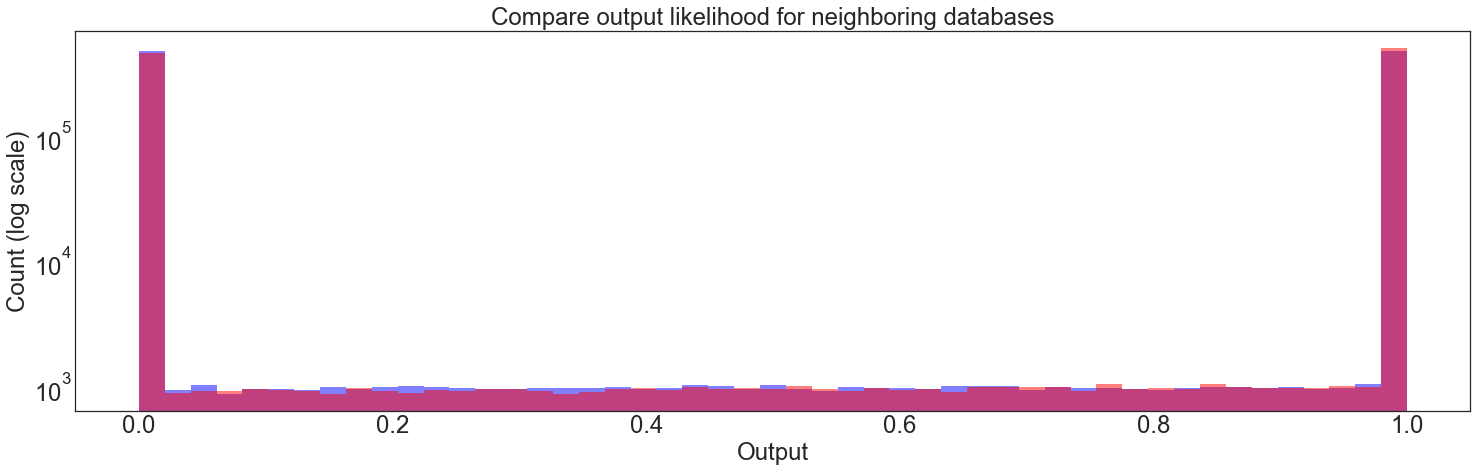

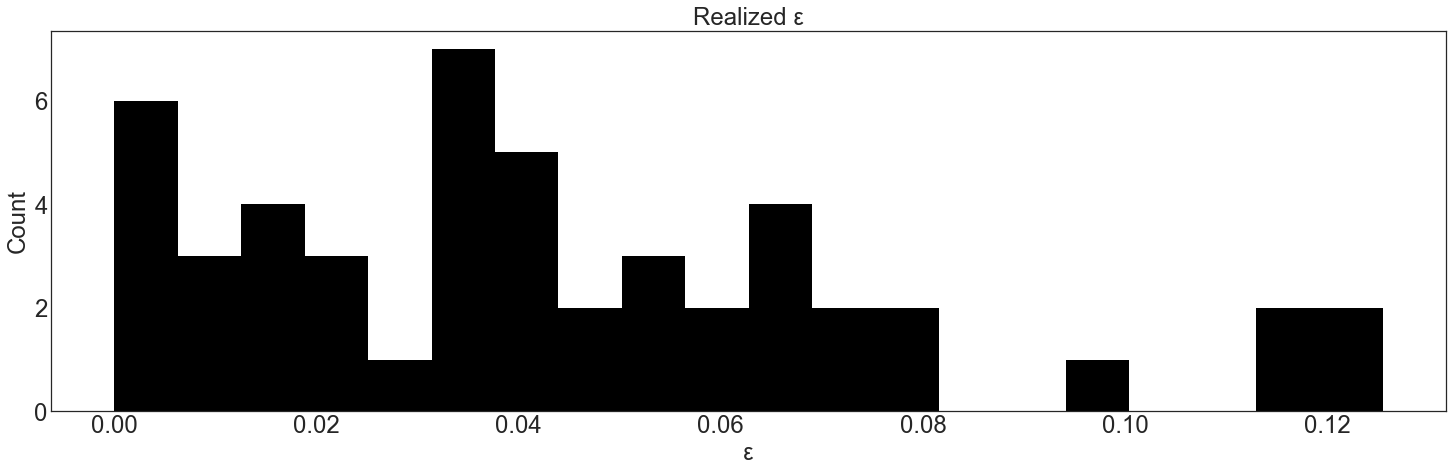

In [4]:
private_mean = PrivateClampedMean(lower_bound=0, upper_bound=1)

T = 1000000
A = [private_mean.execute(values=[], epsilon=0.1) for t in range(T)]
B = [private_mean.execute(values=[1], epsilon=0.1) for t in range(T)]

L = 0
U = 1

A = np.clip(A, L, U)
B = np.clip(B, L, U)

bins = np.linspace(L, U, num=50)

fig, ax = plt.subplots()
ax.set_yscale("log")

plt.hist(A, color='b', alpha=0.5, bins=bins)
plt.hist(B, color='r', alpha=0.5, bins=bins)
plt.title("Compare output likelihood for neighboring databases")
plt.xlabel("Output")
plt.ylabel("Count (log scale)")
plt.show()

A, bin_edges = np.histogram(A, bins=bins)
B, bin_edges = np.histogram(B, bins=bins)

realized_epsilon = np.abs(np.log(A / B))

plt.hist(realized_epsilon, color="k", bins=20)
plt.title("Realized ε")
plt.xlabel("ε")
plt.ylabel("Count")
plt.show()